<a href="https://colab.research.google.com/github/robbi621/skripsi/blob/main/testing_skripsi_saham_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
!wget -O UNTR.csv https://raw.githubusercontent.com/robbi621/skripsi/main/UNTR.JK.csv

--2022-10-21 09:23:05--  https://raw.githubusercontent.com/robbi621/skripsi/main/UNTR.JK.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254503 (249K) [text/plain]
Saving to: ‘UNTR.csv’

UNTR.csv            100%[===================>] 248.54K  --.-KB/s    in 0.03s   

2022-10-21 09:23:05 (9.25 MB/s) - ‘UNTR.csv’ saved [254503/254503]



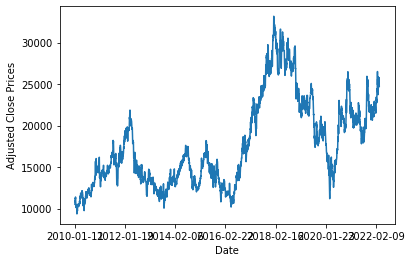

In [ ]:
read_df = pd.read_csv("UNTR.csv")
read_df.set_index("Date", inplace=True)
read_df['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

In [ ]:
df = pd.read_csv("UNTR.csv")
df.set_index("Date", inplace=True)
df.dropna(inplace=True)

In [ ]:
X = df.iloc[:, 0:5].values
y = df.iloc[:, 4].values

In [ ]:
X.shape

(3034, 5)

In [ ]:
y.shape

(3034,)

In [ ]:
training_size=int(len(X)*0.70)
test_size=len(X)-training_size
train_data,test_data=X[0:training_size,:],X[training_size:len(X),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (2123, 5)
test_data:  (911, 1)


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (2107, 15)
y_train:  (2107,)
X_test:  (895, 15)
y_test (895,)


In [ ]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(X_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 30, 'n_estimators': 50, 'min_samples_split': 9, 'min_samples_leaf': 11, 'max_depth': 7, 'bootstrap': True}


In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(predict)
print(predict.shape)

[35102.63351643 33951.52799812 34875.94567345 33621.59962549
 34291.14765967 33656.57722189 33129.99618231 32750.29962099
 33287.40151973 32939.10146415 32703.81490412 32400.652612
 32424.32094634 32736.14624577 32568.56057998 32597.19613265
 32390.01322434 32896.02141368 33280.33410152 33183.58373862
 32957.54027171 32666.48173589 31692.50468177 32993.77805168
 33243.61850742 32789.95993552 32596.81908563 32705.25875731
 32328.50022836 32997.58731753 32737.35982815 32610.09450184
 32293.52465287 31414.25981406 32259.58364059 32161.1509052
 32568.69903307 32216.49884347 32264.95170329 32818.51961579
 32661.22715947 32273.54329388 31334.85088509 32529.53569194
 34135.77417016 32714.74213648 32878.87051024 33046.32873694
 33390.88989502 32733.80099344 32824.09375075 34019.60100733
 34777.71466755 34951.47191234 34952.12959182 33030.6859593
 34945.02551849 34816.45549764 35183.95451975 34752.32530818
 34470.14943703 33391.22529681 33073.42190023 33361.33893941
 32784.94119177 31574.910760

In [ ]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Random Forest Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 440.8097
Mean Squared Error: 341022.0661
Root Mean Squared Error: 583.9709
(R^2) Score: 0.9808
Train Score : 99.76% and Test Score : 98.08% using Random Forest Regressor.
Accuracy: 98.09 %.


In [ ]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values
oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions.csv")
onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions.csv")
fivedays_df = pd.DataFrame(predictions[:5])
fivedays_df.to_csv("five-days-predictions.csv")

In [ ]:
oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
oneyear_df_pred

,Unnamed: 0,Predictions
0,2022-03-31,35102.633516
1,2022-04-01,33951.527998
2,2022-04-02,34875.945673
3,2022-04-03,33621.599625
4,2022-04-04,34291.147660
...,...,...
247,2022-12-03,23143.124331
248,2022-12-04,23005.207048
249,2022-12-05,22071.748914
250,2022-12-06,21780.193367


Buy price and date
            Predictions
Unnamed: 0             
2022-12-07  21698.17056
Sell price and date
            Predictions
Unnamed: 0             
2022-05-28  35183.95452


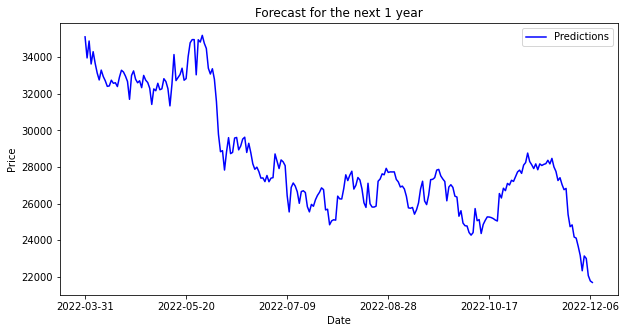

In [ ]:
oneyear_df_pred.set_index("Unnamed: 0", inplace=True)
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
onemonth_df_pred = pd.read_csv("one-month-predictions.csv")
onemonth_df_pred

,Unnamed: 0,Predictions
0,2022-03-31,35102.633516
1,2022-04-01,33951.527998
2,2022-04-02,34875.945673
3,2022-04-03,33621.599625
4,2022-04-04,34291.147660
5,2022-04-05,33656.577222
6,2022-04-06,33129.996182
7,2022-04-07,32750.299621
8,2022-04-08,33287.401520
9,2022-04-09,32939.101464


Buy price and date
             Predictions
Unnamed: 0              
2022-04-16  32390.013224
Sell price and date
             Predictions
Unnamed: 0              
2022-03-31  35102.633516


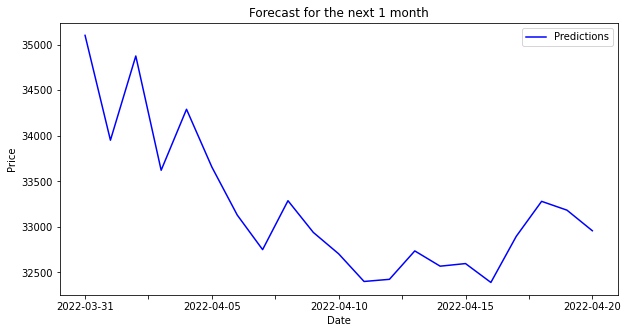

In [ ]:
onemonth_df_pred.set_index("Unnamed: 0", inplace=True)
buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy)
print("Sell price and date")
print(onemonth_sell)
onemonth_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 month", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
fivedays_df_pred = pd.read_csv("five-days-predictions.csv")
fivedays_df_pred

,Unnamed: 0,Predictions
0,2022-03-31,35102.633516
1,2022-04-01,33951.527998
2,2022-04-02,34875.945673
3,2022-04-03,33621.599625
4,2022-04-04,34291.147660


Buy price and date
             Predictions
Unnamed: 0              
2022-04-03  33621.599625
Sell price and date
             Predictions
Unnamed: 0              
2022-03-31  35102.633516


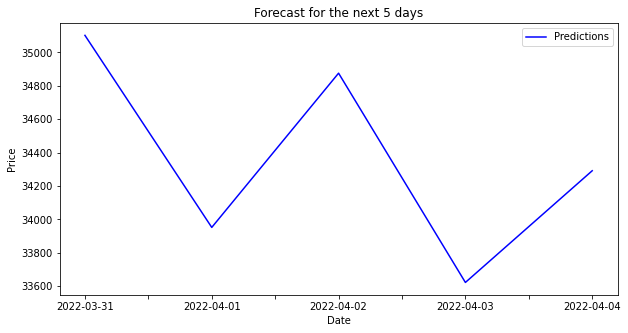

In [ ]:
fivedays_df_pred.set_index("Unnamed: 0", inplace=True)
buy_price = min(fivedays_df_pred["Predictions"])
sell_price = max(fivedays_df_pred["Predictions"])
fivedays_buy = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == buy_price]
fivedays_sell = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(fivedays_buy)
print("Sell price and date")
print(fivedays_sell)
fivedays_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 5 days", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()